In [1]:
import pandas as pd

In [2]:
url = "https://drive.google.com/file/d/12PfTIfKDcFZ581YmQ7OXAbA5Ap1EAGLG/view?usp=drive_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
spotifysongs = pd.read_csv(path)

In [3]:
spotifysongs

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


### Data Cleaning

In [4]:
spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Unnamed: 0                                                                                                                                                                         5235 non-null   int64  
 1   name                                                                                                                                                                               5235 non-null   object 
 2   artist                                                  

In [5]:
# Strip white spaces in columns
spotifysongs.columns = spotifysongs.columns.str.strip()

In [7]:
spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   name              5235 non-null   object 
 2   artist            5235 non-null   object 
 3   danceability      5235 non-null   float64
 4   energy            5235 non-null   float64
 5   key               5235 non-null   int64  
 6   loudness          5235 non-null   float64
 7   mode              5235 non-null   int64  
 8   speechiness       5235 non-null   float64
 9   acousticness      5235 non-null   float64
 10  instrumentalness  5235 non-null   float64
 11  liveness          5235 non-null   float64
 12  valence           5235 non-null   float64
 13  tempo             5235 non-null   float64
 14  type              5235 non-null   object 
 15  duration_ms       5235 non-null   int64  
 16  time_signature    5235 non-null   int64  


In [6]:
# check for missing values
spotifysongs.isnull().sum()

Unnamed: 0          0
name                0
artist              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
id                  0
html                0
dtype: int64

In [7]:
# check for duplicates after dropping columns
spotifysongs.duplicated().sum()

0

In [8]:
# drop columns Unnamed: 0', 'type', 'id', 'html' 
spotifysongs = spotifysongs.drop(columns=['Unnamed: 0', 'duration_ms', 'type', 'html'])
spotifysongs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4,0NLIFSZxPzQhCwnkn5PJYs
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4,3mXqOdlLE1k67WsAxryPFs
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4,7bSzjzjTkWT2CkIPPdp0eA


In [9]:
spotifysongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  time_signature    5235 non-null   int64  
 14  id                5235 non-null   object 
dtypes: float64(9), int64(3), object(3)
memory usage: 613.6+ KB


In [10]:
# copy of the dataframe
df = spotifysongs.copy()

In [11]:
# check for duplicates after dropping columns
df.duplicated().sum()

64

In [12]:
# drop duplicates
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5171 non-null   object 
 1   artist            5171 non-null   object 
 2   danceability      5171 non-null   float64
 3   energy            5171 non-null   float64
 4   key               5171 non-null   int64  
 5   loudness          5171 non-null   float64
 6   mode              5171 non-null   int64  
 7   speechiness       5171 non-null   float64
 8   acousticness      5171 non-null   float64
 9   instrumentalness  5171 non-null   float64
 10  liveness          5171 non-null   float64
 11  valence           5171 non-null   float64
 12  tempo             5171 non-null   float64
 13  time_signature    5171 non-null   int64  
 14  id                5171 non-null   object 
dtypes: float64(9), int64(3), object(3)
memory usage: 646.4+ KB


### Data Exploration

In [13]:
# summary statistics
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,5171.000000,5171.000000,5171.000000,5171.00000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.507604,0.653282,5.264939,-9.37628,0.647264,0.083165,0.291275,0.260326,0.185573,0.442248,118.667082,3.901566
std,0.218101,0.289464,3.571514,6.31599,0.477868,0.071136,0.356862,0.371854,0.149652,0.277927,28.587880,0.422047
min,0.000000,0.000000,0.000000,-60.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.475500,2.000000,-11.38200,0.000000,0.038900,0.002320,0.000001,0.092550,0.195000,96.083500,4.000000
50%,0.536000,0.738000,5.000000,-7.35800,1.000000,0.055600,0.095900,0.002210,0.125000,0.415000,119.058000,4.000000
75%,0.686500,0.895000,8.000000,-5.29550,1.000000,0.098800,0.570000,0.656000,0.237000,0.676000,134.039500,4.000000
max,0.967000,1.000000,11.000000,1.34200,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,5.000000


### Preprocessing

### &nbsp; Scale the data 📐

In [14]:
df.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'id'],
      dtype='object')

In [15]:
# select numeric columns for scaling
numeric_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'time_signature'
]

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df[numeric_columns])

In [17]:
# display column names after scaling
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)
df_scaled.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.8
1,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.8
2,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.8
3,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.8
4,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.8


###  Apply PCA (Principal Component Analysis) ��

In [18]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the scaled data
principal_components = pca.fit_transform(df_scaled)

# Get the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative variance
cumulative_variance = explained_variance.cumsum()

In [51]:
# DataFrame with explained variance and cumulative variance
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance (%)': explained_variance * 100,  
    'Cumulative Variance (%)': cumulative_variance * 100  
})

variance_df

,Principal Component,Explained Variance (%),Cumulative Variance (%)
0,PC1,28.016566,28.016566
1,PC2,26.160265,54.176831
2,PC3,18.439035,72.615866
3,PC4,11.400870,84.016737
4,PC5,6.090410,90.107146
5,PC6,2.763574,92.870720
6,PC7,2.264710,95.135430


In [20]:
# DataFrame with the first 7 principal components
pca_df_7 = pd.DataFrame(data=principal_components[:, :7], 
                        columns=[f'PC{i+1}' for i in range(7)])

print(pca_df_7.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.070595  0.760759 -0.507156  0.436413 -0.255124  0.562891  0.551855
1 -0.034449 -0.452991 -0.386533 -0.225611  0.083778 -0.173537  0.039504
2 -0.145224 -0.499823 -0.473709 -0.231803  0.276260 -0.009798  0.040364
3  0.498328 -0.203194 -0.811766 -0.005154 -0.073651  0.110260  0.221182
4  0.536396 -0.151857 -0.744429  0.174772 -0.150344 -0.082544  0.010329


In [21]:
pca_df_7

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.070595,0.760759,-0.507156,0.436413,-0.255124,0.562891,0.551855
1,-0.034449,-0.452991,-0.386533,-0.225611,0.083778,-0.173537,0.039504
2,-0.145224,-0.499823,-0.473709,-0.231803,0.276260,-0.009798,0.040364
3,0.498328,-0.203194,-0.811766,-0.005154,-0.073651,0.110260,0.221182
4,0.536396,-0.151857,-0.744429,0.174772,-0.150344,-0.082544,0.010329
...,...,...,...,...,...,...,...
5166,1.175199,0.068451,-0.122632,-0.102351,-0.115261,-0.080259,0.001995
5167,0.970202,0.031947,-0.210758,0.176710,-0.304673,-0.099148,-0.023258
5168,1.406248,0.276279,0.024944,0.428863,-0.001666,-0.089204,-0.013065
5169,1.101413,0.048556,-0.220775,-0.000636,-0.272670,-0.073647,0.018299


### &nbsp; Estimate the number of clusters (k) 🔢

#### Elbow method

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# range for the number of clusters
min_clusters = 21
max_clusters = 104

# Elbow Method
inertia = []
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(pca_df_7)  # Use the 7 principal components
    inertia.append(kmeans.inertia_)



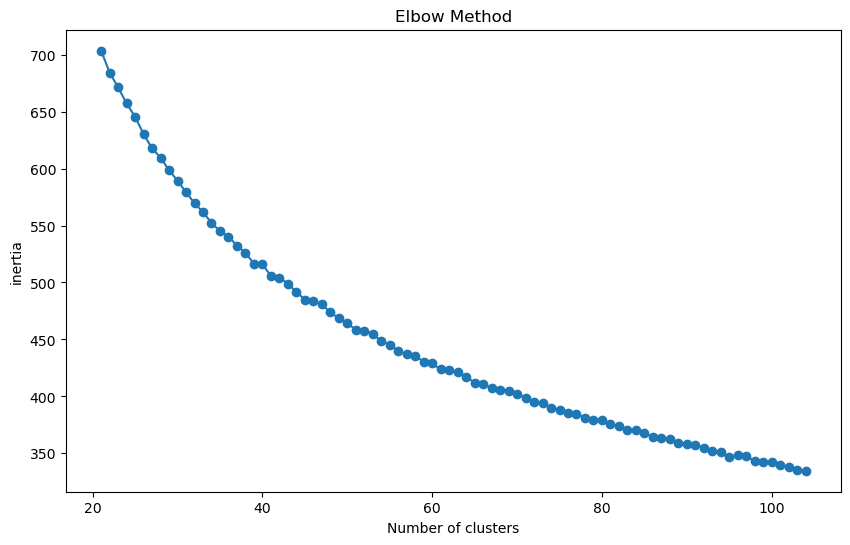

In [23]:
#Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# range for the number of clusters
min_clusters = 21
max_clusters = 104

# Silhouette Analysis
silhouette_scores = []
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=123)
    labels = kmeans.fit_predict(pca_df_7)  # Use the 7 principal components
    silhouette_scores.append(silhouette_score(pca_df_7, labels))


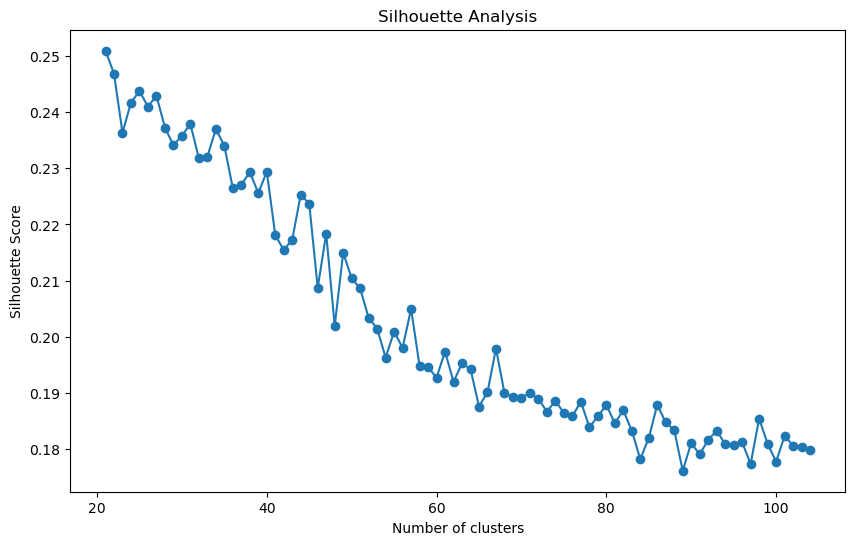

In [25]:
# Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_df_7 = pca.fit_transform(df_scaled)

# Convert to DataFrame 
pca_df_7 = pd.DataFrame(pca_df_7, columns=[f'PC{i+1}' for i in range(7)])

In [27]:
from sklearn.cluster import KMeans

# KMeans clustering with 30 clusters to the PCA-transformed data with 7 components
kmeans_30 = KMeans(n_clusters=30, random_state=123)
clusters_30 = kmeans_30.fit_predict(pca_df_7)

# cluster labels to your PCA dataframe
pca_df_7['Cluster_30'] = clusters_30

# distribution of songs in each cluster
cluster_distribution_30 = pca_df_7['Cluster_30'].value_counts().sort_index()
print(cluster_distribution_30)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster_30
0     246
1     214
2     171
3     332
4     122
5     258
6     123
7      95
8      43
9     112
10    284
11    144
12    329
13    140
14    152
15    102
16    200
17    111
18     79
19    170
20    193
21    181
22    141
23    153
24    105
25    167
26    217
27    251
28    146
29    190
Name: count, dtype: int64


In [28]:
# assigning the cluster labels to the original DataFrame
df_with_clusters = df.copy() 

In [29]:
# Adding the Cluster_30 column back to original DataFrame
df_with_clusters['Cluster_30'] = clusters_30

# Checkingfor any NaN values in 'Cluster_30'
print(df_with_clusters['Cluster_30'].isna().sum())

0


In [30]:
# feature columns for clustering
feature_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                   'time_signature']

In [49]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_result = pca.fit_transform(df[feature_columns])

# Get the loadings (components_)
loadings = pd.DataFrame(pca.components_.T, index=feature_columns, columns=[f'PC{i+1}' for i in range(7)])

In [50]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
danceability,0.000032,-0.012971,-0.000835,0.044963,-0.265039,0.257693,0.100114
energy,-0.002227,-0.035539,-0.000333,-0.012708,0.136420,-0.230251,0.404539
key,0.000012,-0.026653,0.999410,-0.021464,-0.001200,0.000918,-0.000394
loudness,-0.049390,-0.996325,-0.026648,-0.002364,0.021165,0.004783,-0.058170
mode,-0.000068,0.002601,-0.021456,-0.998192,-0.029798,-0.010708,-0.003567
speechiness,-0.000158,-0.002614,0.000402,0.004747,0.009714,-0.020087,0.033681
acousticness,0.002435,0.038845,0.000313,-0.003355,-0.138078,0.287975,-0.810326
instrumentalness,0.000992,0.028075,0.000325,0.012303,0.423323,-0.565651,-0.283741
liveness,-0.000203,-0.003183,0.000847,0.000026,0.012411,-0.016492,0.014262
valence,-0.001022,-0.014440,-0.002518,0.000145,-0.323423,0.312050,0.276519


In [31]:
# Calculating the mean of each feature for each cluster
cluster_means = df_with_clusters.groupby('Cluster_30')[feature_columns].mean()

In [32]:
cluster_means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Cluster_30,,,,,,,,,,,,
0,0.253787,0.899256,1.471545,-8.651659,1.0,0.103963,0.005544,0.818789,0.197743,0.215050,122.091850,3.845528
1,0.730327,0.746500,5.303738,-5.885668,0.0,0.109376,0.130190,0.010539,0.189193,0.719243,116.815463,3.981308
2,0.300918,0.121443,1.637427,-22.579994,1.0,0.043691,0.938187,0.856526,0.133450,0.150272,102.077456,3.637427
3,0.708931,0.734114,1.421687,-7.065575,1.0,0.086170,0.169795,0.013339,0.161866,0.802753,123.015895,3.987952
4,0.297532,0.894205,9.737705,-8.389443,0.0,0.103482,0.014547,0.785443,0.169143,0.233664,124.016336,3.844262
5,0.258638,0.911004,7.810078,-8.052120,1.0,0.105425,0.008794,0.796605,0.204945,0.219726,118.943729,3.922481
6,0.542797,0.498707,2.048780,-8.927715,1.0,0.048543,0.460716,0.029703,0.154138,0.390902,116.980911,3.934959
7,0.578274,0.824958,7.652632,-5.680305,1.0,0.103567,0.122572,0.014650,0.559411,0.525809,125.074653,3.989474
8,0.678442,0.680814,7.000000,-8.332140,0.0,0.072005,0.218420,0.737605,0.183921,0.686605,126.059953,4.000000


In [ ]:
df_with_clusters

In [35]:
import numpy as np

# function to calculate the Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Calculatng the distance from each song to the centroid
distances = []
for index, row in df_with_clusters.iterrows():
    cluster_label = row['Cluster_30']  # Use the Cluster_30 column as the label
    centroid = cluster_means.loc[cluster_label]
    song_features = row[feature_columns]
    
    distance = euclidean_distance(song_features, centroid)
    distances.append(distance)

# Adding the distances value as a new column in the dataframe
df_with_clusters['distance_to_centroid'] = distances

In [36]:
df_with_clusters

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id,Cluster_30,distance_to_centroid
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,4,1n7JnwviZ7zf0LR1tcGFq7,15,5.567135
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,4,5QGM1U0eCYrQuwSJwTm5Zq,3,5.975132
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,4,0NLIFSZxPzQhCwnkn5PJYs,3,29.595840
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,4,3mXqOdlLE1k67WsAxryPFs,24,5.499646
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,4,7bSzjzjTkWT2CkIPPdp0eA,14,14.156754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,4,1aEhYlZtypmipA06SDJ4U3,2,14.265940
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,4,1Gfqe7TAKklmuZf6hxsH6h,20,26.642528
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,3,2XNwnFrdMDpismp0VUZ7cU,20,43.819477
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,4,7ucDwgMtE3YJtEfTbuRhy0,2,35.718073


In [ ]:
df_with_clusters

In [38]:
# Filtering the top 30% closest songs to the centroid for each cluster
df_filtered = df_with_clusters.groupby('Cluster_30').apply(
    lambda x: x.nsmallest(int(len(x) * 0.3), 'distance_to_centroid')
).reset_index(drop=True)

In [ ]:
df_filtered

In [40]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotify_credentials import SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET, SPOTIFY_USERNAME

In [100]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = 'playlist-modify-public'
redirect_uri = 'http://localhost:8888/'

token = SpotifyOAuth(client_id=SPOTIFY_CLIENT_ID,
                     client_secret=SPOTIFY_CLIENT_SECRET,
                     redirect_uri=redirect_uri,
                     scope=scope,
                     username=SPOTIFY_USERNAME)
spotifyObject = spotipy.Spotify(auth_manager=token)

playlist_names = {
    0: "Upbeat Pop Mix",
    1: "High-Energy Rock Collection",
    2: "Intense Instrumentals Vol. 1",
    3: "Dark Electronic Beats",
    4: "Energetic Dance Grooves",
    5: "Top Dance Pop Hits",
    6: "Melancholic Electronica Vibes",
    7: "Indie Pop & Rock Anthems",
    8: "Dramatic Instrumentals Collection",
    9: "Chill Indie Tunes",
    10: "Upbeat Rock/Pop Hits",
    11: "Melancholic Ambient Sounds",
    12: "Energetic Pop Essentials",
    13: "Acoustic Hits",
    14: "Soft Acoustic Moods",
    15: "Reflective Tracks",
    16: "Pop Hits Collection",
    17: "Relaxed Pop Selections",
    18: "Indie Electronica Essentials",
    19: "Melancholic Instrumentals",
    20: "Dark Ambient Atmospheres",
    21: "Intense Instrumentals Vol 2",
    22: "High-Energy Dance Tracks",
    23: "Dark Instrumental Soundscapes",
    24: "Chill Electronica Sessions",
    25: "Alternative Pop Playlist",
    26: "Reflective Soundscapes",
    27: "Energetic Dance Rhythms",
    28: "Dark Dance Hits",
    29: "Instrumental Journeys"
}

playlist_collection = {}

for cluster in df_filtered['Cluster_30'].unique():
    # Use the provided name based on the cluster number
    playlist_name = playlist_names[cluster]
    playlist_description = f'This is a playlist for distinct songs from cluster {cluster}'
    
    # Create the playlist on Spotify
    playlist_id = spotifyObject.user_playlist_create(user=SPOTIFY_USERNAME,
                                                     name=playlist_name,
                                                     public=True,
                                                     description=playlist_description)['id']
    
    # Get all track IDs from the current cluster
    id_list = list(df_filtered.loc[df_filtered["Cluster_30"] == cluster].id)
    
    # Spotify needs certain text wrappers around ID numbers to identify the target as a track
    uris = [f'spotify:track:{str(track_id).strip()}' for track_id in id_list]
    
    # Add tracks to the playlist (Spotify API has a limit of 100 tracks per request)
    for j in range(0, len(uris), 100):
        spotifyObject.user_playlist_add_tracks(user=SPOTIFY_USERNAME,
                                               playlist_id=playlist_id,
                                               tracks=uris[j:j+100])
    
    playlist_collection[playlist_name] = playlist_id
    print(f"Created playlist: {playlist_name} with {len(uris)} tracks")

print("All distinct playlists created successfully!")

Created playlist: Upbeat Pop Mix with 73 tracks
Created playlist: High-Energy Rock Collection with 64 tracks
Created playlist: Intense Instrumentals Vol. 1 with 51 tracks
Created playlist: Dark Electronic Beats with 99 tracks
Created playlist: Energetic Dance Grooves with 36 tracks
Created playlist: Top Dance Pop Hits with 77 tracks
Created playlist: Melancholic Electronica Vibes with 36 tracks
Created playlist: Indie Pop & Rock Anthems with 28 tracks
Created playlist: Dramatic Instrumentals Collection with 12 tracks
Created playlist: Chill Indie Tunes with 33 tracks
Created playlist: Upbeat Rock/Pop Hits with 85 tracks
Created playlist: Melancholic Ambient Sounds with 43 tracks
Created playlist: Energetic Pop Essentials with 98 tracks
Created playlist: Acoustic Hits with 42 tracks
Created playlist: Soft Acoustic Moods with 45 tracks
Created playlist: Reflective Tracks with 30 tracks
Created playlist: Pop Hits Collection with 60 tracks
Created playlist: Relaxed Pop Selections with 33 t

In [54]:
import plotly.express as px

# showing the number of songs in each cluster in the filtered dataframe
cluster_counts = df_filtered['Cluster_30'].value_counts().sort_index()

# bar chart using Plotly
fig = px.bar(cluster_counts, 
             x=cluster_counts.index, 
             y=cluster_counts.values, 
             labels={'x': 'Playlist', 'y': 'Number of Songs'},
             title='Number of Songs in Each Playlist')

fig.show()

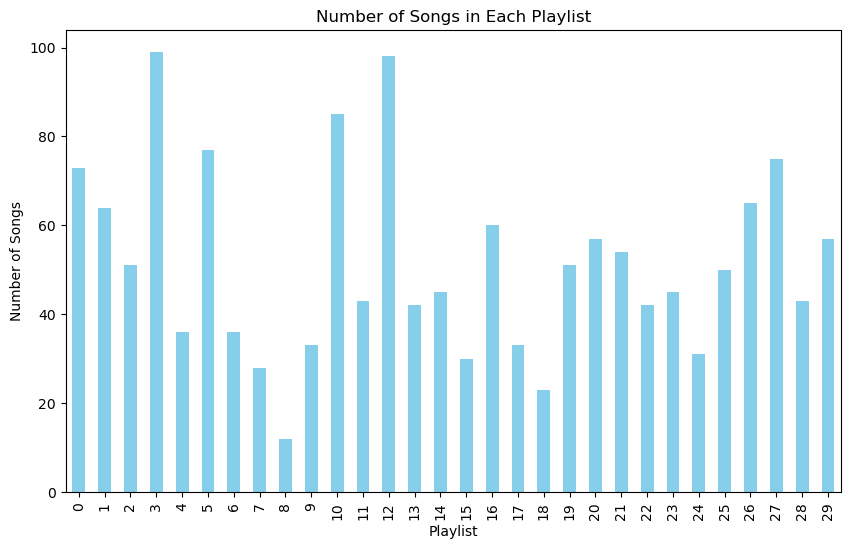

In [53]:
import matplotlib.pyplot as plt

# # showing the number of songs in each cluster in the filtered dataframe
cluster_counts = df_filtered['Cluster_30'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs in Each Playlist' )
plt.xlabel('Playlist')
plt.ylabel('Number of Songs')
plt.show()

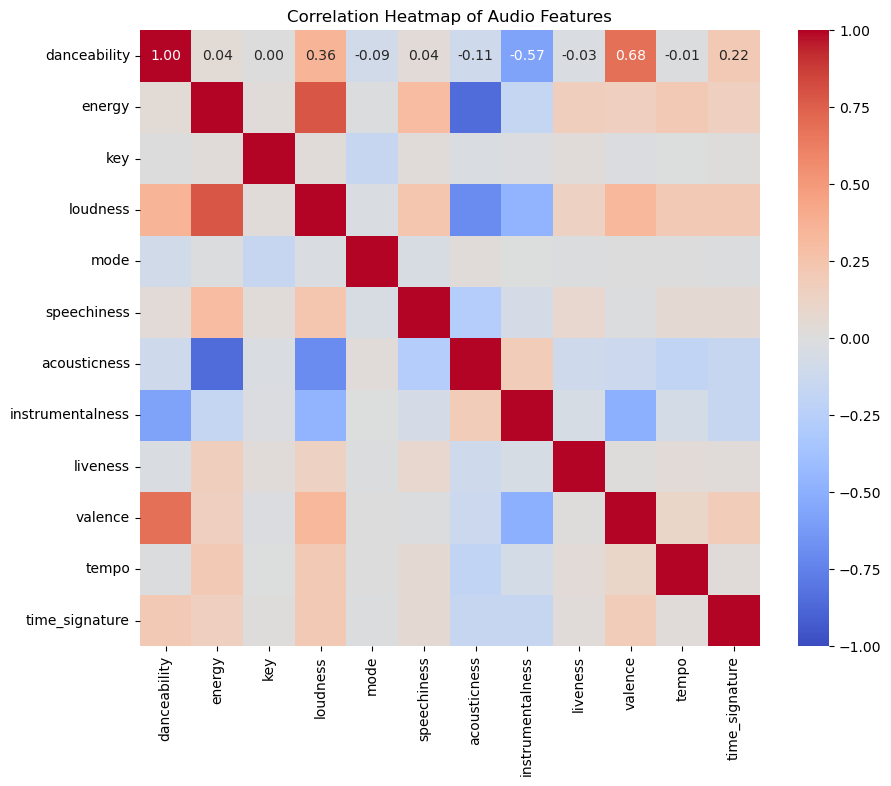

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_with_clusters[feature_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Audio Features')
plt.show()